In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

# Decision Tree Constructor

In [3]:
X = np.array([[0,0,0,0,1,1,1,1,1,1], [0,0,1,1,0,0,1,0,1,1], [0,1,0,1,0,0,0,1,0,0]]).T

In [4]:
y = np.array([1,1,1,0,1,1,0,1,0,0])

In [5]:
clf = DecisionTreeClassifier(random_state=0)
model = clf.fit(pd.DataFrame(X), y)

In [6]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_1 <= 0.50
|   |--- class: 1
|--- feature_1 >  0.50
|   |--- feature_0 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- class: 0



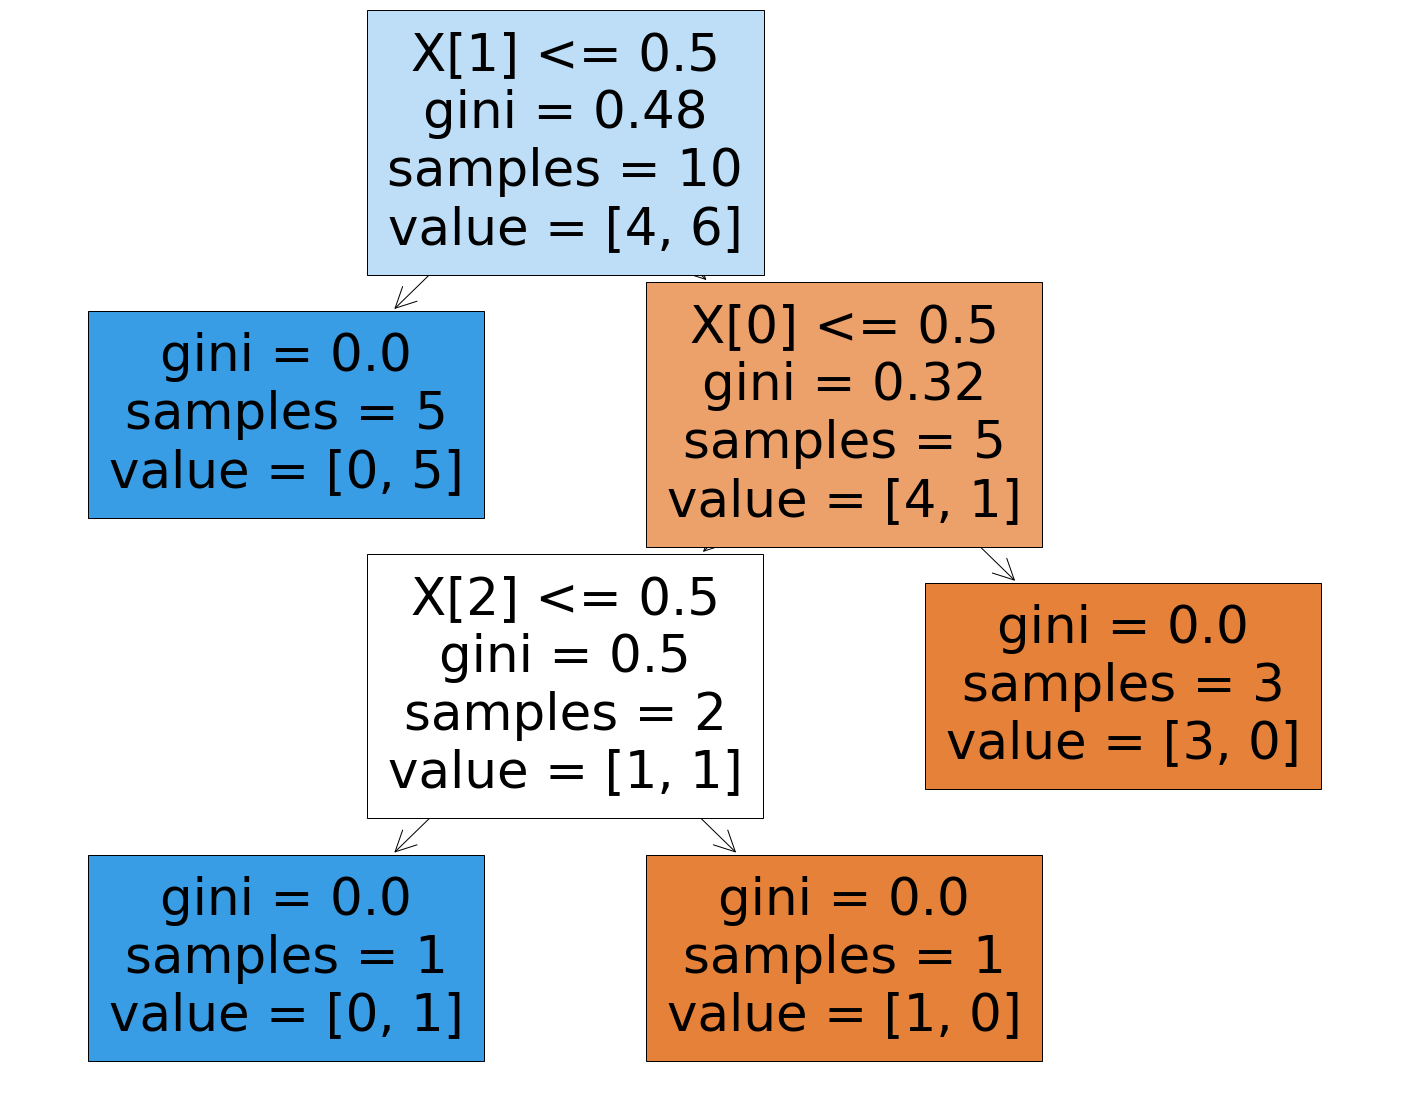

In [7]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,
                   filled=True)

# Gini calculator for continuous variables

In [8]:
def gini_for_cont(data, target):
    avgs = []
    for i in range(len(data)-1):
        avgs.append((data[i] + data[i+1])/2)
    
    gini_list = []
    for avg in avgs:
        count_smaller = list(np.unique(target[np.where(data < avg)], return_counts=True)[1])
        count_higher = list(np.unique(target[np.where(data > avg)], return_counts=True)[1])
        
        if len(count_smaller) == 1:
            if list(np.unique(target[np.where(data < avg)], return_counts=True)[0]) == [0]:
                count_smaller = [count_smaller[0], 0]
            elif list(np.unique(target[np.where(data < avg)], return_counts=True)[0]) == [1]:
                count_smaller = [0, count_smaller[0]]
            gini_smaller = 1 - (count_smaller[0] / sum(count_smaller))**2  - (count_smaller[1] / sum(count_smaller))**2
        else:
            gini_smaller = 1 - (count_smaller[0] / sum(count_smaller))**2  - (count_smaller[1] / sum(count_smaller))**2
            
        if len(count_higher) == 1:
            if list(np.unique(target[np.where(data > avg)], return_counts=True)[0]) == [0]:
                count_higher = [count_higher[0], 0]
            elif list(np.unique(target[np.where(data > avg)], return_counts=True)[0]) == [1]:
                count_higher = [0, count_higher[0]]
            gini_higher = 1 - (count_higher[0] / sum(count_higher))**2  - (count_higher[1] / sum(count_higher))**2
        else:
            gini_higher = 1 - (count_higher[0] / sum(count_higher))**2  - (count_higher[1] / sum(count_higher))**2
        
        count_total = [sum(count_smaller), sum(count_higher)]
        
        total_gini = gini_smaller * (count_total[0] / sum(count_total)) + gini_higher * (count_total[1] / sum(count_total))
        
        
        gini_list.append(round(total_gini, 3))
    return avgs, gini_list





data = np.array(list([7,18,35,38]))
target = np.array(list([0,1,1,1]))

print(gini_for_cont(data, target))

([12.5, 26.5, 36.5], [0.0, 0.25, 0.333])


# Gini calculator for discrete variables

In [43]:
def gini_for_discr(data, target):
    true = target[np.where(data == 1)] #1
    false = target[np.where(data == 0)] #0
    
    true_unique = np.unique(true, return_counts=True)
    false_unique = np.unique(false, return_counts=True)

    count_true = list(np.unique(true, return_counts=True)[1])
    count_false = list(np.unique(false, return_counts=True)[1])

    if len(true_unique[0]) == 1:
        if true_unique[0][0] == 0:
            count_true = list([count_true[0], 0])
        if true_unique[0][0] == 1:
            count_true = list([0, count_true[0]])

    if len(false_unique[0]) == 1:
        if false_unique[0][0] == 0:
            count_false = list([count_false[0], 0])
        if false_unique[0][0] == 1:
            count_false = list([0, count_false[0]])

    gini_true = 1 - (count_true[0] / sum(count_true))**2 - (count_true[1] / sum(count_true))**2
    gini_false = 1 - (count_false[0] / sum(count_false))**2 - (count_false[1] / sum(count_false))**2
    total_gini = gini_true * (sum(count_true) / (sum(count_true) + sum(count_false))) + gini_false * (sum(count_false) / (sum(count_true) + sum(count_false)))
    
    return (gini_true, gini_false, total_gini)





data = np.array(list([1, 0, 1,1,1,0,0]))
target = np.array(list([0,0,1,1,1,0,0]))

gini_for_discr(data, target)

(0.375, 0.0, 0.21428571428571427)

# Correlation matrix and its metrics

In [62]:
from sklearn.metrics import confusion_matrix


y_true = [1,0,0,1,0,0,1,0,0,1]
y_pred = [1,0,0,1,0,0,0,1,0,0]


print(confusion_matrix(y_true, y_pred))
print()
print('TP  |  FN')
print('-----------')
print('FP  |  TN')

tp, fn, fp, tn = confusion_matrix(y_true, y_pred).ravel()

[[5 1]
 [2 2]]

TP  |  FN
-----------
FP  |  TN


In [67]:
from sklearn.metrics import classification_report
print('!!!USE RESULTS ONLY FROM FIRST ROW (WITH INDEX 0)!!!')
print()
print(classification_report(y_true, y_pred))
print()
print('Specificy : ', tn / (tn + fp))

!!!USE RESULTS ONLY FROM FIRST ROW (WITH INDEX 0)!!!

              precision    recall  f1-score   support

           0       0.71      0.83      0.77         6
           1       0.67      0.50      0.57         4

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10


Specificy :  0.5
